
# Project: Investigate a Dataset (tmdb-movies)
>The Purpose of this project is to wrangle, explore and communicate insights related to the movie data in the tmdb database.

I intend to investigate the following 3 questions:

>**1) What is the general relationship between budget and revenue?** I would expect that larger budget films typically attract bigger audiences. Additionally, I wonder if there are any meaningful differences when considering inflation-adjusted results.

>**2) Are there certain cast members or Directors that are consistently associated with large blockbuster hits?** I assume certain directors and actors build a star-power that correlates with blockbuster performances.

>**3) How has the market share of movie release revenues changed over time in terms of the various production companies?** Aside from directors and actors, I wonder if certain production companies are able to find a formula that helps them succeed with their movie releases. Some production companies have access to select franchises, where the success of the movies would likely be associated with the popularity of those franchises.

## Table of Contents
### 1) Data Assessment
### 2) Data Cleaning
### 3) Conclusions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
df = pd.read_csv('tmdb-movies.csv')

# 1) Data Assessment
>This section assesses the unadultered data in the CSV file. By reviewing the number of rows, columns, data types and null cells, I will be able to determine which questions I'd like to explore further and what data cleaning will be necessary to answer those questions.

In [2]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


This data set includes 10,866 rows and 21 columns. The data types associated with the set include floats, integers and strings.

# 2) Data Cleaning
>Based on the observations made during the assessment phase, there are a number of cleanup actions that are needed in order to make it easier to answer the above proposed questions. For one, there are many columns (data fields) that do not relate to the questions being asked. Secondly, there are a number of null cells that will need to be handled dependent upon which data fields are relevant for each of the exploratory questions. Finally, the cast and production company data columns have multiple objects in them that are separated by pipes.

First task is to drop unnecessary columns. This will help address the first question:
>**1) What is the general relationship between budget and revenue?** I would expect that larger budget films typically attract bigger audiences. Additionally, I wonder if there are any meaningful differences when considering inflation-adjusted results.

In [7]:
df.drop(['id','imdb_id','popularity','homepage','tagline','keywords','overview','runtime','genres','release_date','vote_count','vote_average'],axis = 1,inplace=True)

Now looking at the second question:

>**2) Are there certain cast members or Directors that are consistently associated with large blockbuster hits?**

It will be helpful to drop the null rows for the data we're trying to isolate.

In [8]:
df_cast_dir = df.dropna(subset=['cast','director'])
df_cast_dir['cast'].str.count('\\|').max()

At this point, I need to separate the instances of cast members and production companies that are all merged into their respective column entries.
In both cases, the maximum separators seem to be 4 per row. Starting with the cast data, my objective is to separate the instances multiple entries, and then append the separated instances together so I can see the revenues associated with each actor and production company. The total sum of all the revenue will be larger than the underlying data because the question I'm asking involves duplication of revenue data since there are multiple actors and production companies per film.  

In [11]:
df_cast_dir['cast0'] = df_cast_dir['cast'].str.split(pat="\\|",expand=True)[0]
df_cast_dir['cast1'] = df_cast_dir['cast'].str.split(pat="\\|",expand=True)[1]
df_cast_dir['cast2'] = df_cast_dir['cast'].str.split(pat="\\|",expand=True)[2]
df_cast_dir['cast3'] = df_cast_dir['cast'].str.split(pat="\\|",expand=True)[3]
df_cast_dir['cast4'] = df_cast_dir['cast'].str.split(pat="\\|",expand=True)[4]
df_cast_dir_0 = df_cast_dir.drop(['cast','cast1','cast2','cast3','cast4'],axis=1)
df_cast_dir_1 = df_cast_dir.drop(['cast','cast0','cast2','cast3','cast4'],axis=1)
df_cast_dir_2 = df_cast_dir.drop(['cast','cast0','cast1','cast3','cast4'],axis=1)
df_cast_dir_3 = df_cast_dir.drop(['cast','cast0','cast1','cast2','cast4'],axis=1)
df_cast_dir_4 = df_cast_dir.drop(['cast','cast0','cast1','cast2','cast3'],axis=1)
df_cast_dir_0.rename(columns={'cast0':'new_cast'},inplace=True)
df_cast_dir_1.rename(columns={'cast1':'new_cast'},inplace=True)
df_cast_dir_2.rename(columns={'cast2':'new_cast'},inplace=True)
df_cast_dir_3.rename(columns={'cast3':'new_cast'},inplace=True)
df_cast_dir_4.rename(columns={'cast4':'new_cast'},inplace=True)
frames = [df_cast_dir_0,df_cast_dir_1,df_cast_dir_2,df_cast_dir_3,df_cast_dir_4]
df_cast_dir_merge = pd.concat(frames)
df_cast_dir_merge = df_cast_dir_merge.groupby(['new_cast'])['revenue'].sum().sort_values(ascending = False).reset_index()
df_cast_dir_merge.head(10)

,new_cast,revenue
0,Harrison Ford,8922840695
1,Tom Cruise,8812436186
2,Tom Hanks,8418142612
3,Emma Watson,8176916698
4,Ian McKellen,8115046043
5,Johnny Depp,7979521265
6,Daniel Radcliffe,7863036755
7,Rupert Grint,7696691044
8,Robert Downey Jr.,7419289468
9,Ralph Fiennes,7135927496


Looking at the third question:

>**3) How has the market share of movie release revenues changed over time in terms of the various production companies?**

It will be helpful to drop the null rows for the data we're trying to isolate.

In [10]:
df_prod_comp = df.dropna(subset=['production_companies'])
df_prod_comp['production_companies'].str.count('\\|').max()

4

In addition to the multiple entry issue in a single cell similar to above, I want to look at the top production company revenue trends over time. In order to do this, I need to identify the top companies to build a query around, and then groupby company and year data.

In [12]:
df_prod_comp['comp0'] = df_prod_comp['production_companies'].str.split(pat="\\|",expand=True)[0]
df_prod_comp['comp1'] = df_prod_comp['production_companies'].str.split(pat="\\|",expand=True)[1]
df_prod_comp['comp2'] = df_prod_comp['production_companies'].str.split(pat="\\|",expand=True)[2]
df_prod_comp['comp3'] = df_prod_comp['production_companies'].str.split(pat="\\|",expand=True)[3]
df_prod_comp['comp4'] = df_prod_comp['production_companies'].str.split(pat="\\|",expand=True)[4]
df_prod_comp_0 = df_prod_comp.drop(['production_companies','comp1','comp2','comp3','comp4'],axis=1)
df_prod_comp_1 = df_prod_comp.drop(['production_companies','comp0','comp2','comp3','comp4'],axis=1)
df_prod_comp_2 = df_prod_comp.drop(['production_companies','comp0','comp1','comp3','comp4'],axis=1)
df_prod_comp_3 = df_prod_comp.drop(['production_companies','comp0','comp1','comp2','comp4'],axis=1)
df_prod_comp_4 = df_prod_comp.drop(['production_companies','comp0','comp1','comp2','comp3'],axis=1)
df_prod_comp_0.rename(columns={'comp0':'new_comp'},inplace=True)
df_prod_comp_1.rename(columns={'comp1':'new_comp'},inplace=True)
df_prod_comp_2.rename(columns={'comp2':'new_comp'},inplace=True)
df_prod_comp_3.rename(columns={'comp3':'new_comp'},inplace=True)
df_prod_comp_4.rename(columns={'comp4':'new_comp'},inplace=True)
frames = [df_prod_comp_0,df_prod_comp_1,df_prod_comp_2,df_prod_comp_3,df_prod_comp_4]
df_prod_comp_merge = pd.concat(frames)
df_prod_comp_merge.drop(['budget','original_title','cast','director','budget_adj','revenue_adj'],axis = 1,inplace=True)
comp_list = df_prod_comp_merge.groupby(['new_comp'])['revenue'].sum().sort_values(ascending = False).reset_index().head(10)
clist = comp_list['new_comp'].tolist()
df_comp_line = df_prod_comp_merge.query("new_comp == @clist").groupby(['new_comp','release_year'])['revenue'].sum().reset_index()
df_comp_line.groupby(['release_year','new_comp'])['revenue'].sum()

release_year  new_comp                              
1960          Columbia Pictures                                  0
              Paramount Pictures                          17100000
              Twentieth Century Fox Film Corporation             0
              Warner Bros.                                       0
1961          Columbia Pictures                           28900000
                                                           ...    
2015          Touchstone Pictures                         13603453
              Twentieth Century Fox Film Corporation    2214043657
              Universal Pictures                        3878448797
              Walt Disney Pictures                      1982731836
              Warner Bros.                              1691168351
Name: revenue, Length: 420, dtype: int64

# 3) Conclusions
>Now that all of the data is prepared and organized, it's time to draw some conclusions and discuss potential concerns with thte outputs. 

After dropping the irrelevant columns for these particular questions, I will explore the first question...

<AxesSubplot:title={'center':'Revenue vs Budget'}, xlabel='budget', ylabel='revenue'>

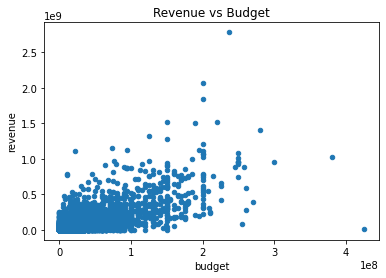

In [20]:
def scatterplots(X,Y,Z):
    return df.plot(x=X, y=Y, kind = 'scatter', title=Z);

scatterplots('budget','revenue','Revenue vs Budget')

There appears to be a positive correlation between budget and revenue. Is there any impact if we look at inflation-adjusted data instead?

<AxesSubplot:title={'center':'Adjusted Revenue vs Budget'}, xlabel='budget_adj', ylabel='revenue_adj'>

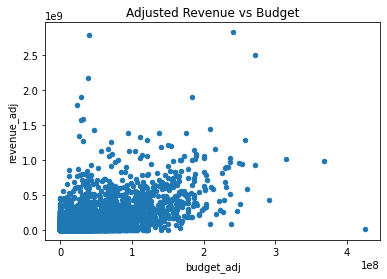

In [22]:
scatterplots('budget_adj','revenue_adj','Adjusted Revenue vs Budget')

The scatter plot is slightly more dispersed, but the positive correlation is still evident. For both scatterplots, I used the population of data. This visually demonstrates the relationship between budget and revenue.

Now, I will turn my attention over to the second question regarding revenue associated with cast members and directors.

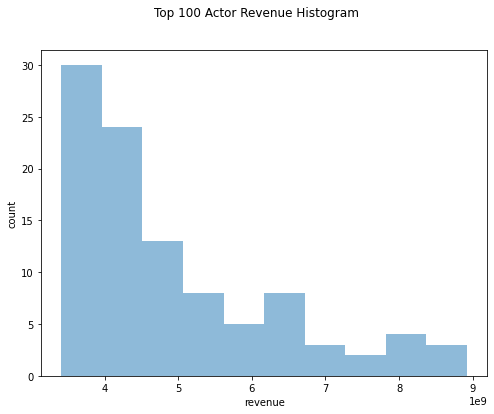

In [33]:
fig, ax = plt.subplots(figsize =(8,6))
plt.suptitle('Top 100 Actor Revenue Histogram')
ax.hist(df_cast_dir_merge['revenue'].head(100),bins = 10, alpha=.5, label='revenue')
ax.set_xlabel('revenue')
ax.set_ylabel('count');

In terms of the top 100 actors, the distribution appears to be right skewed.

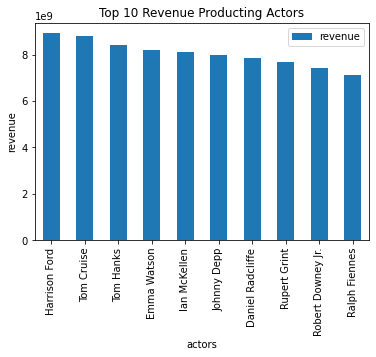

In [36]:
df_cast_dir_merge.head(10).plot.bar(x='new_cast',y='revenue')
plt.title("Top 10 Revenue Producting Actors")
plt.xlabel("actors")
plt.ylabel("revenue");

However, within the top echelon, these top 10 actors appear to truly be outliers in terms of their association with blockbuster hits.

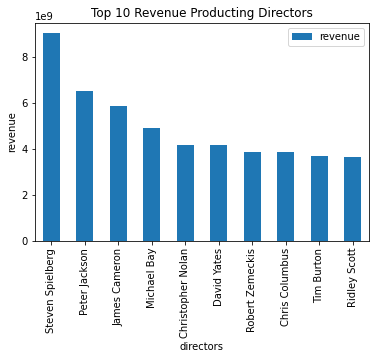

In [37]:
df_cast_dir.groupby(['director'])['revenue'].sum().sort_values(ascending = False).reset_index().head(10).plot.bar(x='director',y='revenue')
plt.title("Top 10 Revenue Producting Directors")
plt.xlabel("directors")
plt.ylabel("revenue");

In terms of directors, Stephen Spielberg seems to have the magic touch with the number one overall position.

To get a sense of the significance of actors and directors in terms of their impact on revenue, I decided to highlight the top 100 actors and top 10 actors and directors. This sample helps eliminate the noise of the many data points that are less meaningful. In the context of the full dataset, it's clear that certain actors and directors are significantly associated with blockbuster performance. 

Now to look at the third question considering revenue generated over time by various production companies:

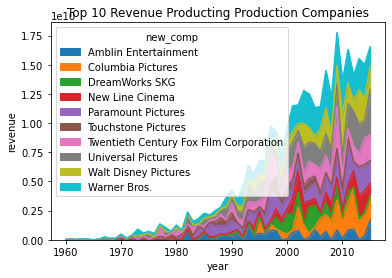

In [38]:
df_comp_line.groupby(['release_year','new_comp'])['revenue'].sum().unstack().plot.area()
plt.title("Top 10 Revenue Producting Production Companies")
plt.xlabel("year")
plt.ylabel("revenue");

It appears that the all-time top 10 revenue generating production companies have drastically accelerated their nominal activity in the last 3 decades. These companies' comparative market share seems to oscilate depending upon any given year. Some possible further considerations of this data would be to potentially look at other production companies on the overall list that are really just subsidiaries of the top 10 listed here. Including subsidiary companies should better illustrate the parent company's true market share trends.  